In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install google-api-python-client
!pip install pandas
!pip install IPython


In [3]:
from googleapiclient.discovery import build 
import os
import pandas as pd
from IPython.display import JSON

# 

In [4]:
# reading api_key from file
api_key = ""
with open("key.txt","r") as f:
    api_key = f.read()

In [5]:
    # Get credentials and create an API client

api_service_name = "youtube"
api_version = "v3"
youtube = build (
    api_service_name, api_version, developerKey=api_key )
channel_id = "UCX6OQ3DkcsbYNE6H8uQQuVA"

In [6]:
# -*- coding: utf-8 -*-

def get_channels(youtube,channel_id):
    total_data = []
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=channel_id
    )
    response = request.execute()
    

    # loop through items
    for item in response['items']:
        data = {
                "Channel_Name" : item['snippet']['title'],
                "Suscribers" : item['statistics']['subscriberCount'],
                "View" : item['statistics']['viewCount'],
                "TotalVideo" : item['statistics']['videoCount'],
                "PlaylistId" : item['contentDetails']['relatedPlaylists']['uploads']
               }

    total_data.append(data)
    return pd.DataFrame(total_data)

def get_videos(youtube, video_id):
    video_ids = []
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=video_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
    next_page_token = response.get('nextPageToken')

    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part="snippet,contentDetails",
            playlistId=video_id,
            maxResults = 50,
            pageToken=next_page_token
        )
        response = request.execute()
        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
        next_page_token = response.get('nextPageToken')
        # print(len(video_ids))
        
    return video_ids

channel_data = get_channels(youtube, channel_id)
video_id = str(channel_data['PlaylistId'][0]).strip()
video_ids =  get_videos(youtube, video_id)


# 

In [7]:
def get_video_data(video_ids):
    # Get video data for the given video IDs in chunks of 50
    all_video_data = []
    
    for i in range(0, len(video_ids), 50):
        batch_ids = video_ids[i:i + 50]
        
        # Request video details in chunks
        video_response = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=",".join(batch_ids)
        ).execute()
        
        # Extend the result into all_video_data
        all_video_data.extend(video_response.get("items", []))
    
    return all_video_data


In [8]:
response = get_video_data(video_ids)
JSON(response)



<IPython.core.display.JSON object>

In [9]:
#create a dictionary which will store columns of our data
my_video_data = {
    'video_id' : [],
    'channel_title' : [],
    'title' : [],
    'description' : [],
    'published_at' : [],
    'view_count' : [],
    'like_Count' : [],
    'favourite_Count' : [],
    'duration' : [],
    'caption' : [],
    'defination' : [],
    'commentCount' : []
}


### ->inserting data in dataset

In [10]:
for item in response:
    my_video_data['video_id'].append(item.get('id', '0'))
    my_video_data['channel_title'].append(item['snippet'].get('channelTitle', '0'))
    my_video_data['title'].append(item['snippet'].get('title', '0'))
    my_video_data['description'].append(item['snippet'].get('description', '0'))
    my_video_data['like_Count'].append(item['statistics'].get('likeCount', '0'))
    my_video_data['favourite_Count'].append(item['statistics'].get('favoriteCount', '0'))
    my_video_data['duration'].append(item['contentDetails'].get('duration', '0'))
    my_video_data['caption'].append(item['contentDetails'].get('caption', '0'))
    my_video_data['defination'].append(item['contentDetails'].get('definition', '0'))
    my_video_data['view_count'].append(item['statistics'].get('viewCount', '0'))
    my_video_data['published_at'].append(item['snippet'].get('publishedAt', '0'))
    my_video_data['commentCount'].append(item['statistics'].get('commentCount', '0'))


In [11]:
for key, value in my_video_data.items():
    print(f"{key}: {len(value)}")

video_id: 868
channel_title: 868
title: 868
description: 868
published_at: 868
view_count: 868
like_Count: 868
favourite_Count: 868
duration: 868
caption: 868
defination: 868
commentCount: 868


### ->Displaying data

In [12]:
df = pd.DataFrame(my_video_data)
df

,video_id,channel_title,title,description,published_at,view_count,like_Count,favourite_Count,duration,caption,defination,commentCount
0,TN1wErFGTzM,MrBeast,"Find This Key, Win $10,000",Shop Mother’s Day flowers on DoorDash now: htt...,2025-05-05T16:00:00Z,1545831,92619,0,PT39S,false,hd,903
1,3dxksf0CzS8,MrBeast,World’s Fastest Robbers,That robber kinda looks like @DanielLaBelle,2025-05-02T16:00:00Z,112484047,3074614,0,PT32S,false,hd,7907
2,x7yv72s8h0o,MrBeast,Would You Go On Vacation With A Stranger?,,2025-04-29T16:00:00Z,95977680,3914151,0,PT1M3S,false,hd,14028
3,uyiG6uw-6pA,MrBeast,"Would You Risk Drowning for $500,000?",These were crazy dangerous so everything was p...,2025-04-26T16:00:00Z,95950976,2358188,0,PT25M46S,true,hd,35477
4,M1STzb7k9L8,MrBeast,Extreme Helmet Game,,2025-04-25T16:15:00Z,110957574,1454745,0,PT23S,false,hd,4111
...,...,...,...,...,...,...,...,...,...,...,...,...
863,7qj3nuF9Dzw,MrBeast,Most Epic minecraft skin EVER (Psy),Psy in minecraft!!! drop a like for psy's mo...,2013-01-13T01:59:21Z,1180240,42987,0,PT31S,false,hd,3583
864,Y74b7WlcEpk,MrBeast,More birds IN MINECRAFT!!,Basically what this mod does is adds more bird...,2013-01-12T23:35:45Z,1318037,48182,0,PT2M6S,false,hd,3811
865,Z8nEEdXTaX0,MrBeast,Boxy item mod Minecraft. EPIC,At the begining i said i was mrbeast6000.... i...,2013-01-12T22:34:11Z,1552551,56782,0,PT1M30S,false,hd,4269
866,jP82d277Cc8,MrBeast,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,One of the coolest mods i have ever seen\n\nMo...,2012-03-09T23:29:03Z,5849572,0,0,PT3M59S,false,hd,9248


In [13]:
#checking for null values
df.isnull().any()

video_id           False
channel_title      False
title              False
description        False
published_at       False
view_count         False
like_Count         False
favourite_Count    False
duration           False
caption            False
defination         False
commentCount       False
dtype: bool

In [14]:
df.dtypes

video_id           object
channel_title      object
title              object
description        object
published_at       object
view_count         object
like_Count         object
favourite_Count    object
duration           object
caption            object
defination         object
commentCount       object
dtype: object

In [15]:
df['like_Count'] = df['like_Count'].apply(pd.to_numeric)
df['favourite_Count'] = df['favourite_Count'].apply(pd.to_numeric)
df['commentCount'] = df['commentCount'].apply(pd.to_numeric)
df['view_count'] = df['view_count'].apply(pd.to_numeric)

In [16]:
# create link
df['video_link'] = df['video_id'].apply(lambda x: f"https://www.youtube.com/watch?v={x}")

In [17]:
#most viewed video
df[df['view_count'] == df['view_count'].max()].video_link

148    https://www.youtube.com/watch?v=se50viFJ0AQ
Name: video_link, dtype: object

In [18]:
df[df['view_count'] == df['view_count'].min()].video_link


542    https://www.youtube.com/watch?v=DL0OPJ2hahc
664    https://www.youtube.com/watch?v=UXw9jqgJNNc
Name: video_link, dtype: object

In [19]:
df['view_count'].describe

<bound method NDFrame.describe of 0        1545831
1      112484047
2       95977680
3       95950976
4      110957574
         ...    
863      1180240
864      1318037
865      1552551
866      5849572
867     29897662
Name: view_count, Length: 868, dtype: int64>

In [20]:
df.columns

Index(['video_id', 'channel_title', 'title', 'description', 'published_at',
       'view_count', 'like_Count', 'favourite_Count', 'duration', 'caption',
       'defination', 'commentCount', 'video_link'],
      dtype='object')

In [21]:
df['Published_date'] = df['published_at'].str.split('T').str[0]

In [22]:
df['Published_time'] = df['published_at'].str.split('T').str[1]

In [23]:
len(df[df['Published_time'].str[-1] == 'Z'])

868

In [24]:
df['Published_time'] = df['Published_time'].str.replace('Z','')
df['Published_time']

0      16:00:00
1      16:00:00
2      16:00:00
3      16:00:00
4      16:15:00
         ...   
863    01:59:21
864    23:35:45
865    22:34:11
866    23:29:03
867    22:42:32
Name: Published_time, Length: 868, dtype: object

In [25]:
import isodate

In [26]:
 df['duration'] = df['duration'].apply(
    lambda x: isodate.parse_duration(x) if isinstance(x, str) else None
)

In [27]:
df['duration']

0     0 days 00:00:39
1     0 days 00:00:32
2     0 days 00:01:03
3     0 days 00:25:46
4     0 days 00:00:23
            ...      
863   0 days 00:00:31
864   0 days 00:02:06
865   0 days 00:01:30
866   0 days 00:03:59
867   0 days 00:02:37
Name: duration, Length: 868, dtype: timedelta64[ns]

In [28]:
from datetime import datetime, timedelta

df['duration'] = df['duration'].apply(lambda x: (datetime.min + x).time())

In [29]:
from  datetime import time
df['duration']

0      00:00:39
1      00:00:32
2      00:01:03
3      00:25:46
4      00:00:23
         ...   
863    00:00:31
864    00:02:06
865    00:01:30
866    00:03:59
867    00:02:37
Name: duration, Length: 868, dtype: object

In [30]:
df['Published_date'] = pd.to_datetime(df['Published_date'])


In [31]:
df.columns

Index(['video_id', 'channel_title', 'title', 'description', 'published_at',
       'view_count', 'like_Count', 'favourite_Count', 'duration', 'caption',
       'defination', 'commentCount', 'video_link', 'Published_date',
       'Published_time'],
      dtype='object')

### EDA Begins


In [32]:
monthly_time_series = df.groupby(df['Published_date'].dt.month)['view_count'].sum().reset_index()
monthly_time_series.head()

,Published_date,view_count
0,1,3768161857
1,2,4814961440
2,3,5802864849
3,4,7292676555
4,5,5700487706


<Axes: title={'center': 'Monthly view count'}, xlabel='Published_date', ylabel='view_count'>

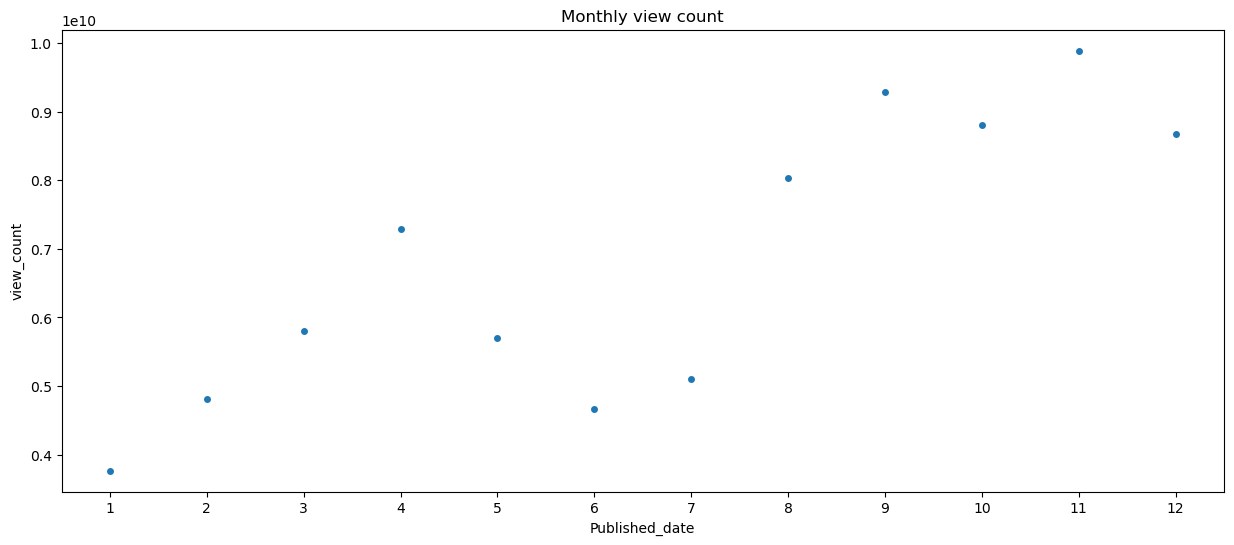

In [33]:
plt.figure(figsize=(15, 6))
plt.title("Monthly view count")
sns.stripplot(data=monthly_time_series,x='Published_date',y='view_count')

In [34]:
daily_view = df.groupby(df['Published_date'].dt.day)['view_count'].sum().reset_index()

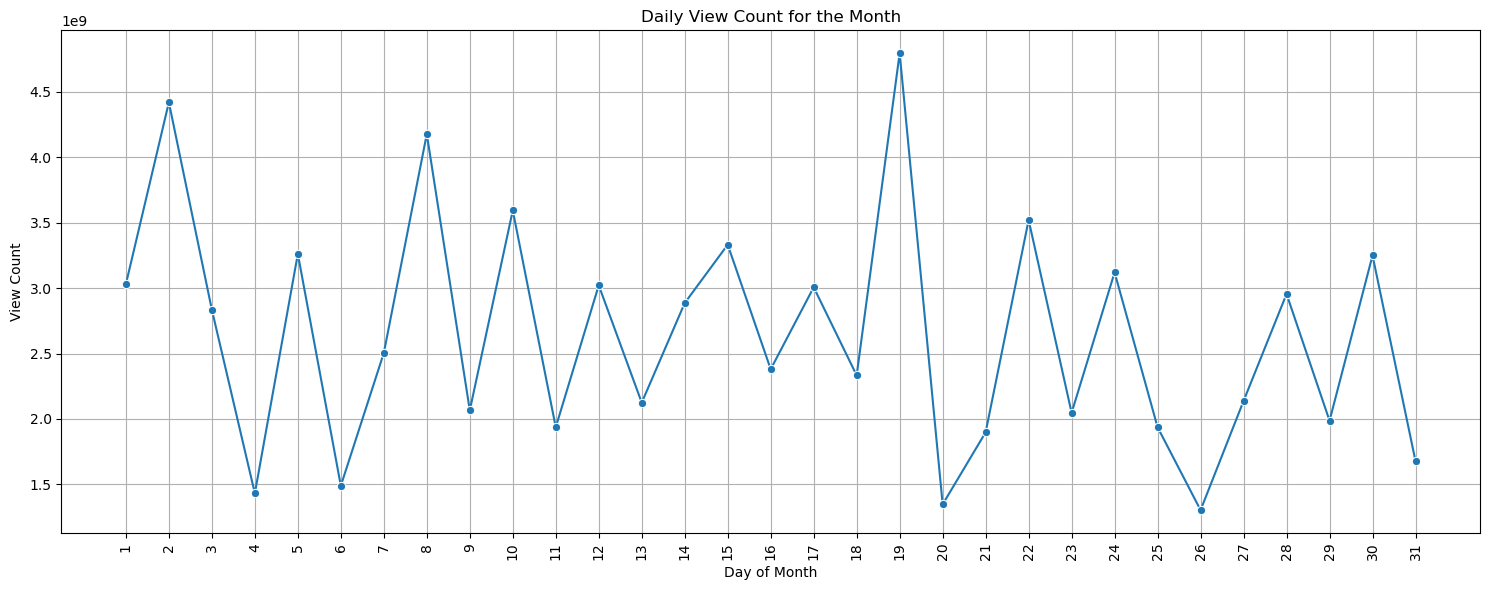

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.lineplot(data=daily_view, x='Published_date', y='view_count', marker='o')

# Ensure all unique days are shown
plt.xticks(
    ticks=daily_view['Published_date'],
    labels=daily_view['Published_date'],
    rotation=90
)

plt.xlabel("Day of Month")
plt.ylabel("View Count")
plt.title("Daily View Count for the Month")
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
df.columns

Index(['video_id', 'channel_title', 'title', 'description', 'published_at',
       'view_count', 'like_Count', 'favourite_Count', 'duration', 'caption',
       'defination', 'commentCount', 'video_link', 'Published_date',
       'Published_time'],
      dtype='object')

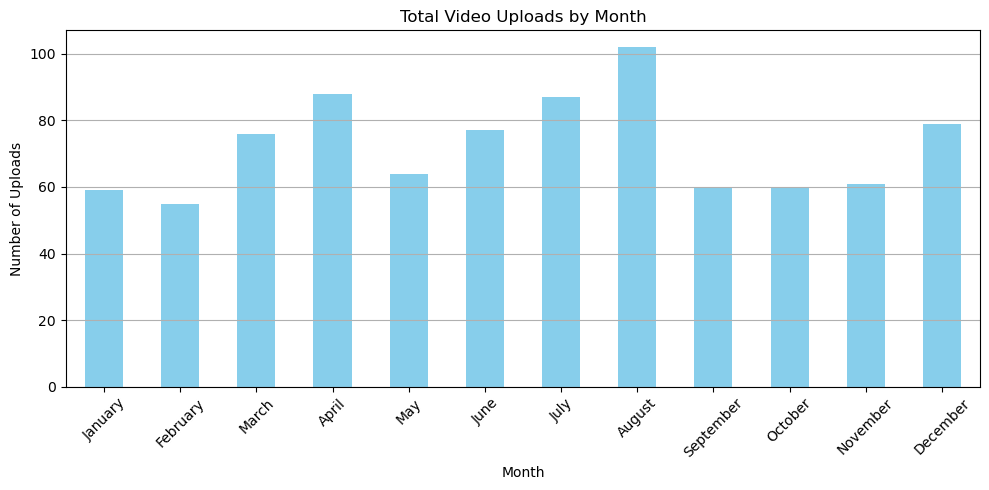

In [37]:
df.set_index('Published_date', inplace=True)
df.reset_index(inplace=True)
df['month_name'] = df['Published_date'].dt.month_name()

# Step 3: Count uploads per month
monthly_uploads = df['month_name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Step 4: Plot
plt.figure(figsize=(10, 5))
monthly_uploads.plot(kind='bar', color='skyblue')
plt.title('Total Video Uploads by Month')
plt.xlabel('Month')
plt.ylabel('Number of Uploads')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

df.reset_index(inplace=True)


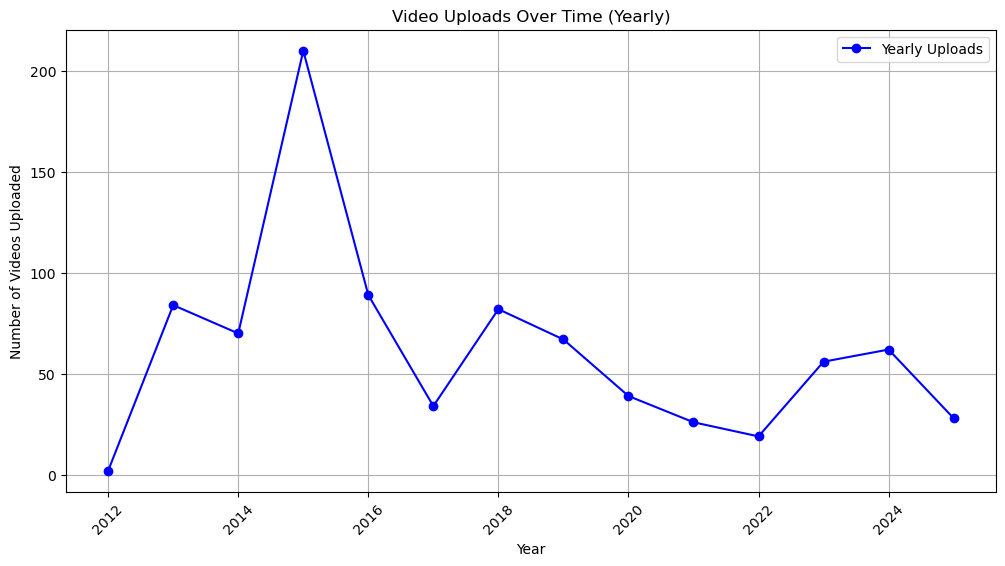

In [40]:
df.reset_index(inplace=True)
df.set_index('Published_date', inplace=True)
yearly_uploads = df.resample('YE').size()
yearly_uploads.index = yearly_uploads.index.year

plt.figure(figsize=(12, 6))
plt.plot(yearly_uploads.index, yearly_uploads, label='Yearly Uploads', color='blue', marker='o')
plt.title('Video Uploads Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Videos Uploaded')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()
df.reset_index(inplace=True)